In [124]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
from matplotlib import style


import numpy as np
import math

from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [125]:
df = pd.read_excel('CDC.xlsx',sheet_name='Sheet1')

In [126]:
df.head()

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value
0,AK,2015,April,12 month-ending,Cocaine (T40.5),NaN,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
1,AK,2015,April,12 month-ending,Heroin (T40.1),NaN,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
2,AK,2015,April,12 month-ending,Natural & semi-synthetic opioids (T40.2),NaN,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
3,AK,2015,April,12 month-ending,Percent with drugs specified,88.095238,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
4,AK,2015,April,12 month-ending,"Opioids (T40.0-T40.4,T40.6)",NaN,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN


In [127]:
#### Limiting to PA

### Removing 80 - * because there is only one
## Removing Unknown survival.
oddf = df
oddf = oddf.loc[oddf['Indicator']=='Number of Drug Overdose Deaths']


In [128]:
oddf.head()

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value
6,AK,2015,April,12 month-ending,Number of Drug Overdose Deaths,126.0,100,0.0,Alaska,Numbers may differ from published reports usin...,**,127.0
12,AK,2015,August,12 month-ending,Number of Drug Overdose Deaths,124.0,100,0.0,Alaska,Numbers may differ from published reports usin...,**,125.0
25,AK,2015,December,12 month-ending,Number of Drug Overdose Deaths,121.0,100,0.0,Alaska,Numbers may differ from published reports usin...,**,122.0
46,AK,2015,February,12 month-ending,Number of Drug Overdose Deaths,127.0,100,0.0,Alaska,Numbers may differ from published reports usin...,**,128.0
57,AK,2015,January,12 month-ending,Number of Drug Overdose Deaths,126.0,100,0.0,Alaska,Numbers may differ from published reports usin...,**,127.0


In [129]:
from datetime import datetime

In [130]:
oddf['Year'] = oddf['Year'].astype(str)
#oddf = oddf.loc[oddf['Year']=='2018']

C:\Users\Loganj2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [131]:
oddf['Date'] = oddf['Month'] + " " + oddf['Year']
oddf['Date'] = pd.to_datetime(oddf['Date'])

#df['Incident Date'] = pd.to_datetime(df['Incident Date'])

C:\Users\Loganj2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Loganj2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [133]:
oddf = oddf.sort_values('Date')

<b> Importing census data to get a percentage of deaths by overdose by population

In [134]:
demo_train = demo_data = pd.read_excel('population-00-18.xlsx',sheetname='Population')

C:\Users\Loganj2\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [135]:
demo_train = demo_train.rename(columns = {'State/Region': 'State',2000:'2000',2001:'2001',2002:'2002',2003:'2003'
                                         ,2004:'2004',2005:'2005',2006:'2006',2007:'2007',2008:'2008',2009:'2009'
                                         ,2010:'2010',2011:'2011',2012:'2012',2013:'2013',2014:'2014',2015:'2015'
                                         ,2016:'2016',2017:'2017',2018:'2018'})

<h2> Census data does not have 2019 data. Using Linear Regression to predict 2019 population

In [137]:
def linear_model(years_train,pop_train,years_test,pop_test,X,y):  ## LR
    
   
    regressor = LinearRegression()  
    regressor.fit(years_train, pop_train) #training the algorithm

    a = X[-1]
    a = a +1
    #print(a)
    X = np.append(X, a)
    X = X.reshape(-1,1)
    
    pred1 = regressor.predict(X)
    #print(pred1)
    pred1 = pred1[-1]
   
    acc = regressor.score(years_test,pop_test)
  
    return(pred1)
    

def train_mod(train_mod_df, year_end): 
    import math
    j = train_mod_df.columns.values[-1]
    j = int(j)

    while j < year_end:
        j = j + 1
        new_train_df = train_df_load(train_mod_df, j)
       # print(j)

    return(new_train_df)

def train_df_load(train_df, j_num):
    for i, row in train_df.iterrows():
       #### print(row)
        population = np.array(row[1:])
        years = list(train_df.columns.values)
        years.pop(0) ## removing the name
        if len(years)> len(population):   ## for each pass
            years.pop(-1)
        years = [int(k) for k in years] ## making them ints
        years = np.array(years) ## creating a years array
        X = years.reshape(-1,1)
        y = population.reshape(-1,1)
        
        X= X[-7:]
        y = y[-7:]# last 10 years
        years_train, years_test, pop_train, pop_test = train_test_split(X,y)
        gain = linear_model(years_train,pop_train,years_test,pop_test,X,y)
        next_year = (gain) ### Projected Gain + last year
        next_year = next_year[0]
       # print(next_year)
        next_year = int(np.round(next_year))
        next_year = math.trunc(next_year)
        year_ar = str(j_num)
        train_df.loc[i,year_ar] = next_year        
    return(train_df)

In [138]:
demo_model = train_mod(demo_train, 2019)

In [139]:
demo_model.head()

,State,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Alabama,4452173,4467634,4480089,4503491,4530729,4569805,4628981,4672840,4718206,...,4785448,4798834,4815564,4830460,4842481,4853160,4864745,4875120,4887871,4899549.0
1,Alaska,627963,633714,642337,648414,659286,666946,675302,680300,687455,...,713906,722038,730399,737045,736307,737547,741504,739786,737438,745167.0
2,Arizona,5160586,5273477,5396255,5510364,5652404,5839077,6029141,6167681,6280362,...,6407774,6473497,6556629,6634999,6733840,6833596,6945452,7048876,7171646,7264386.0
3,Arkansas,2678588,2691571,2705927,2724816,2749686,2781097,2821761,2848650,2874554,...,2921978,2940407,2952109,2959549,2967726,2978407,2990410,3002997,3013825,3023230.0
4,California,33987977,34479458,34871843,35253159,35574576,35827943,36021202,36250311,36604337,...,37320903,37641823,37960782,38280824,38625139,38953142,39209127,39399349,39557045,40040048.0


In [140]:
oddf.head()

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value,Date
6822,IL,2015,January,12 month-ending,Number of Drug Overdose Deaths,1652.0,100,0.025229,Illinois,Numbers may differ from published reports usin...,**,1661.0,2015-01-01
17877,OK,2015,January,12 month-ending,Number of Drug Overdose Deaths,794.0,100,0.021171,Oklahoma,Numbers may differ from published reports usin...,**,798.0,2015-01-01
7438,IN,2015,January,12 month-ending,Number of Drug Overdose Deaths,1162.0,100,0.033776,Indiana,Numbers may differ from published reports usin...,**,1170.0,2015-01-01
17217,OH,2015,January,12 month-ending,Number of Drug Overdose Deaths,2829.0,100,0.006038,Ohio,Numbers may differ from published reports usin...,**,2836.0,2015-01-01
23982,VA,2015,January,12 month-ending,Number of Drug Overdose Deaths,959.0,100,0.037847,Virginia,Numbers may differ from published reports usin...,**,966.0,2015-01-01


In [141]:
oddf = oddf[['State Name','State','Date','Year','Month','Data Value']]

In [142]:
mixdf = pd.merge(oddf, demo_model, how = "left", left_on='State Name', right_on = 'State')

In [153]:
mixdf.head()

,State Name,State_x,Date,Year,Month,Data Value,State_y,2000,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,% Of OD Deaths Vs Total Population
0,Illinois,IL,2015-01-01,2015,January,1652.0,Illinois,12434161.0,12488445.0,12525556.0,...,12867291.0,12884119.0,12898269.0,12888962.0,12864342.0,12826895.0,12786196.0,12741080.0,12718266.0,0.012842
1,Oklahoma,OK,2015-01-01,2015,January,794.0,Oklahoma,3454365.0,3467100.0,3489080.0,...,3787821.0,3818600.0,3853205.0,3878367.0,3909831.0,3926769.0,3932640.0,3943079.0,3979697.0,0.020308
2,Indiana,IN,2015-01-01,2015,January,1162.0,Indiana,6091866.0,6127760.0,6155967.0,...,6516045.0,6537640.0,6568367.0,6593533.0,6608296.0,6633344.0,6660082.0,6691878.0,6712018.0,0.017584
3,Ohio,OH,2015-01-01,2015,January,2829.0,Ohio,11363543.0,11387404.0,11407889.0,...,11543463.0,11548369.0,11576576.0,11602973.0,11617850.0,11635003.0,11664129.0,11689442.0,11709285.0,0.024350
4,Virginia,VA,2015-01-01,2015,January,959.0,Virginia,7105817.0,7198362.0,7286873.0,...,8100469.0,8185229.0,8253053.0,8312076.0,8362907.0,8410946.0,8465207.0,8517685.0,8574868.0,0.011467


In [144]:
### Getting % by peroid
def by_per(df):
    for i, row in df.iterrows():
        if row['Year'] == '2015':
            per = row['Data Value'] /row['2015']
           
        elif row['Year'] == '2016':
            per = row['Data Value'] /row['2016']
        elif row['Year'] == '2017':
            per = row['Data Value'] /row['2017']            
        elif row['Year'] == '2018':
            per = row['Data Value'] /row['2018']            
        elif row['Year'] == '2019':
            per = row['Data Value'] /row['2019']
            
        per = per * 100    
        df.loc[i,'% Of OD Deaths Vs Total Population'] = per    
    return(df)   
        


In [145]:
newdf = by_per(mixdf)

In [146]:
newdf.head()

,State Name,State_x,Date,Year,Month,Data Value,State_y,2000,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,% Of OD Deaths Vs Total Population
0,Illinois,IL,2015-01-01,2015,January,1652.0,Illinois,12434161.0,12488445.0,12525556.0,...,12867291.0,12884119.0,12898269.0,12888962.0,12864342.0,12826895.0,12786196.0,12741080.0,12718266.0,0.012842
1,Oklahoma,OK,2015-01-01,2015,January,794.0,Oklahoma,3454365.0,3467100.0,3489080.0,...,3787821.0,3818600.0,3853205.0,3878367.0,3909831.0,3926769.0,3932640.0,3943079.0,3979697.0,0.020308
2,Indiana,IN,2015-01-01,2015,January,1162.0,Indiana,6091866.0,6127760.0,6155967.0,...,6516045.0,6537640.0,6568367.0,6593533.0,6608296.0,6633344.0,6660082.0,6691878.0,6712018.0,0.017584
3,Ohio,OH,2015-01-01,2015,January,2829.0,Ohio,11363543.0,11387404.0,11407889.0,...,11543463.0,11548369.0,11576576.0,11602973.0,11617850.0,11635003.0,11664129.0,11689442.0,11709285.0,0.024350
4,Virginia,VA,2015-01-01,2015,January,959.0,Virginia,7105817.0,7198362.0,7286873.0,...,8100469.0,8185229.0,8253053.0,8312076.0,8362907.0,8410946.0,8465207.0,8517685.0,8574868.0,0.011467


In [147]:
newforplot = newdf[['State Name','Date','% Of OD Deaths Vs Total Population','Year']]

In [148]:
newforplot = newforplot.sort_values('Date')  

In [149]:
padf = newforplot.loc[newforplot['State Name']=='Pennsylvania']
cadf = newforplot.loc[newforplot['State Name']=='California']
nydf = newforplot.loc[newforplot['State Name']=='New York']
vtdf = newforplot.loc[newforplot['State Name']=='Vermont']
wvdf = newforplot.loc[newforplot['State Name']=='West Virginia']


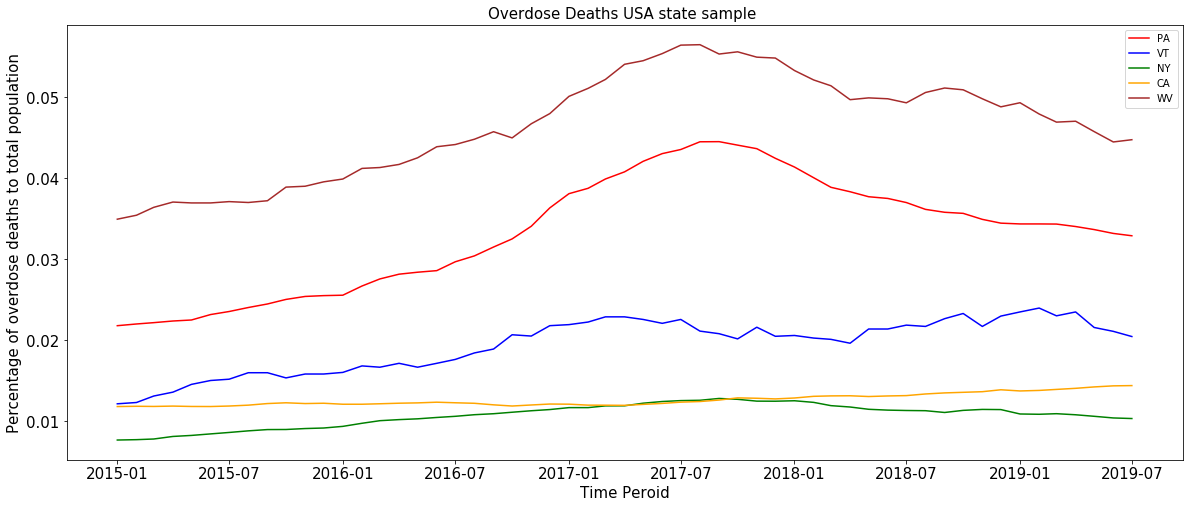

In [152]:
line_fig = plt.figure(figsize =(20,8))
_ = plt.plot(padf["Date"],padf["% Of OD Deaths Vs Total Population"],color = "red",label='PA')
_ = plt.plot(vtdf["Date"],vtdf["% Of OD Deaths Vs Total Population"],color = "blue",label ='VT')
_ = plt.plot(nydf["Date"],nydf["% Of OD Deaths Vs Total Population"],color = "green",label ='NY')
_ = plt.plot(cadf["Date"],cadf["% Of OD Deaths Vs Total Population"],color = "orange",label ='CA')
_ = plt.plot(wvdf["Date"],wvdf["% Of OD Deaths Vs Total Population"],color = "brown",label ='WV')

## Set the tick and label fontsize
plt.tick_params(labelsize = 15)

## Set the title
_ = plt.title("Overdose Deaths USA State Sample ", fontsize = 15)

## Set the y-label
_ = plt.ylabel("Percentage of overdose deaths to total population", fontsize = 15)

## Set the x-label
_ = plt.xlabel("Time Peroid", fontsize = 15)
plt.legend()
plt.show()